# Persistence Images
Persistence Images (PI) are one of the most popular _vectorization_ methods in TDA. 

### Why are vectorizations like Persistence Images useful?
The space of Persistence Diagrams (PDs) are well-defined metric spaces with metrics like Wasserstein distance and Bottleneck distance defined on them. However, PDs can be computationally expensive and infeasible while working with real world datasets. _Vectorization methods in TDA_ were proposed to address this issue. These methods attempt to map the space of barcodes to a "well-behaved" Hilbert spaces that are easier to work with and stable w.r.t. input noise.

**Note**: Persistence Images omit points corresponding to infinite persistence.

In [42]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import ripser
import persim as pm
import tadasets
import gudhi as gd

`PersistenceImager()` class has pre-defined default attribute values that can be altered if required. It transformer which converts persistence diagrams into persistence images.

In [43]:
# instantiate a PersistenceImager() object
PI = pm.PersistenceImager()
# default values for the class
print(PI)

PersistenceImager(birth_range=(0.0, 1.0), pers_range=(0.0, 1.0), pixel_size=0.2, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})


In [44]:
# print default attribute value
print(PI.pixel_size)

# modify attribute value
PI.pixel_size = 0.1
print(PI.pixel_size)

0.2
0.1


Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


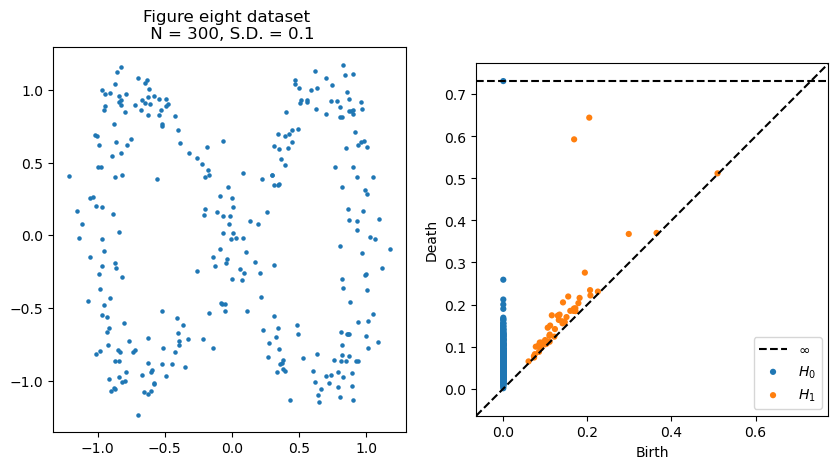

In [45]:
# generate dataset
N = 300; sd = 0.1
infty_sign = tadasets.infty_sign(n=N, noise=sd)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (10,5))
# plot the dataset on the left
axs[0].scatter(x = infty_sign[:,0], y = infty_sign[:,1], s=5)
axs[0].set_title(f"Figure eight dataset \n N = {N}, S.D. = {sd}")
# PD plot on the right
rips = ripser.Rips()
PDs = rips.fit_transform(infty_sign)
rips.plot(PDs, ax=axs[1])
plt.show()

The `PI.fit()` method can be called on one or more numpy arrays of size $(., 2)$ to automatically determine the minimum birth and persistence ranges needed to capture all persistence pairs. The ranges and resolution are automatically adjusted to accommodate the specified pixel size. 

The option `skew=True` specifies that the diagram is currently in birth-death coordinates and must first be transformed to birth-persistence coordinates

In [46]:
# Filter out points with infinite persistence
PD_0 = PDs[0][~np.isinf(PDs[0][:, 1])]
PD_1 = PDs[1][~np.isinf(PDs[1][:, 1])]
PD_finite = [PD_0, PD_1]

# Fit the PersistenceImager
PI.fit(PD_finite, skew = True)

# look at the parameter values
print(PI)

PersistenceImager(birth_range=(-0.04520581960678105, 0.554794180393219), pers_range=(-0.029646098613739014, 0.470353901386261), pixel_size=0.1, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})


Use `PI.plot_diagram()` method to plot birth-death or birth persistence plots. Set `skew = True` to generate birth-persistence diagrams.

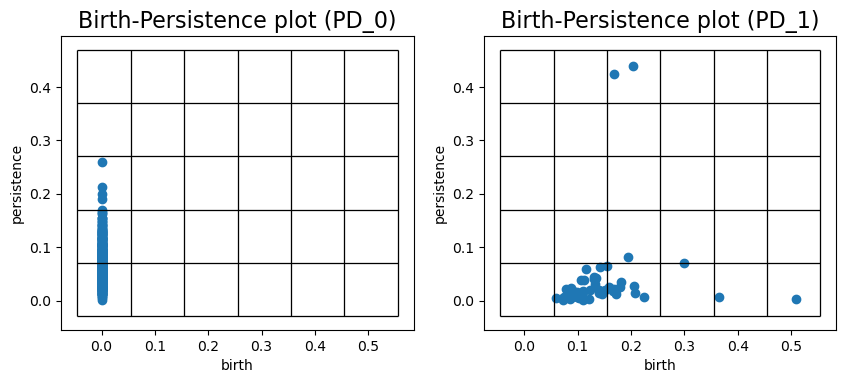

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Plot each persistence diagram in PD_finite
for i, PD in enumerate(PD_finite):
	PI.plot_diagram(PD, skew=True, ax=axs[i])
	axs[i].set_title(f'Birth-Persistence plot (PD_{i})', fontsize=16)

plt.show()

- Use the `PI.transform()` method to generate persistence images from persistence diagrams.
- Use`PI.plot_image()` to plot the persistence images. 

In [49]:
PI.kernel_params = {'sigma': 0.01}

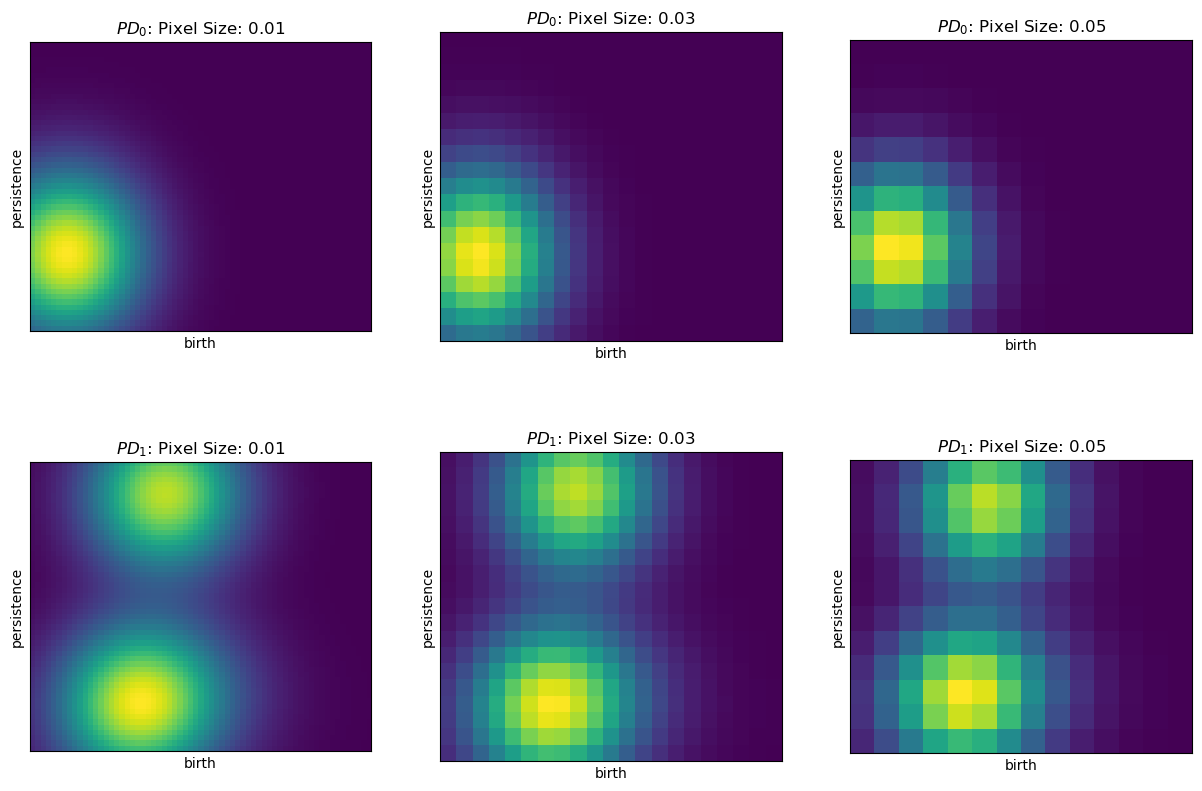

In [50]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot for pixel size 0.01
PI.pixel_size = 0.01
PI.plot_image(PI.transform(PD_finite[0]), ax=axs[0,0])
axs[0,0].set_title(f'$PD_0$: Pixel Size: {PI.pixel_size}', fontsize=12)
PI.plot_image(PI.transform(PD_finite[1]), ax=axs[1,0])
axs[1,0].set_title(f'$PD_1$: Pixel Size: {PI.pixel_size}', fontsize=12)

# Plot for pixel size 0.03
PI.pixel_size = 0.03
PI.plot_image(PI.transform(PD_finite[0]), ax=axs[0,1])
axs[0,1].set_title(f'$PD_0$: Pixel Size: {PI.pixel_size}', fontsize=12)
PI.plot_image(PI.transform(PD_finite[1]), ax=axs[1,1])
axs[1,1].set_title(f'$PD_1$: Pixel Size: {PI.pixel_size}', fontsize=12)

# Plot for pixel size 0.05
PI.pixel_size = 0.05
PI.plot_image(PI.transform(PD_finite[0]), ax=axs[0,2])
axs[0,2].set_title(f'$PD_0$: Pixel Size: {PI.pixel_size}', fontsize=12)
PI.plot_image(PI.transform(PD_finite[1]), ax=axs[1,2])
axs[1,2].set_title(f'$PD_1$: Pixel Size: {PI.pixel_size}', fontsize=12)

plt.show()

## References
1. H Adams, T Emerson, et. al 2017. _Persistence images: a stable vector representation of persistent homology._ J. Mach. Learn. Res. 18, 1 (January 2017), 218–252.
2. Scikit-TDA tutorial on Persistence Diagrams - https://persim.scikit-tda.org/en/latest/notebooks/Persistence%20images.html